In [1]:
//%jsroot on

In [2]:
TFile *ipf=new TFile("data_16Cs.root");
TTree* tree=(TTree*)ipf->Get("tree");
TCanvas* c1=new TCanvas("c1","c1");

## D1和D2的X面上同时有且只有一根的硅微条有信号的事件太多，所以trigger：
### 要求D1和D2的X面上，同时有两根条以上有信号（M2=Multipicity>=2)

# 一、拿到数据先观察数据结构及内容

In [3]:
tree->Scan("d1xe:d1xs:d1ye:d1ys","","",10,1);//从1号事件开始，扫描十个

***********************************************************************
*    Row   * Instance *      d1xe *      d1xs *      d1ye *      d1ys *
***********************************************************************
*        1 *        0 *      4800 *        17 *      5775 *        18 *
*        1 *        1 *       982 *        18 *           *           *
*        2 *        0 *      3069 *        23 *      3352 *        11 *
*        2 *        1 *       341 *        24 *       111 *        10 *
*        3 *        0 *      5325 *        23 *      4522 *        15 *
*        3 *        1 *           *           *       922 *        16 *
*        4 *        0 *      5822 *        21 *      5688 *        15 *
*        4 *        1 *           *           *       271 *        14 *
*        5 *        0 *      4048 *        11 *      5213 *        12 *
*        5 *        1 *      1149 *        12 *           *           *
*        6 *        0 *      3719 *        14 *      4255 *     

# **inter-strip correlation**

* ### 当有相邻条有信号时，为以下两种原因：
 #### 1、入射粒子入射到两条之间的缝隙，载流子被相邻两条收集
 #### 2、某一条上有很大的能量沉积，导致相邻条产生感应信号

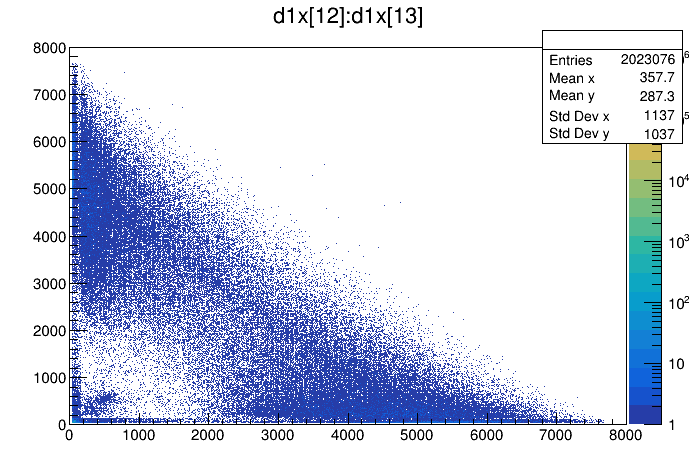

In [4]:
tree->Draw("d1x[12]:d1x[13]>>(1000,0,8000,1000,0,8000)","","colz");//inter-strip correlation
gPad->SetLogz();
c1->Draw();

## 选取D1X面相邻条进行观察
## Phenomena：
* ### x,y轴附近100道左右有大量事件，说明事件中仍然有pedal影响
* ### 从分布来说，靠近坐标轴的事件较多，说明大部分事件即便能量共享，也只是共享了一小部分能量，共享的原因更多也是因为电荷感应产生共享

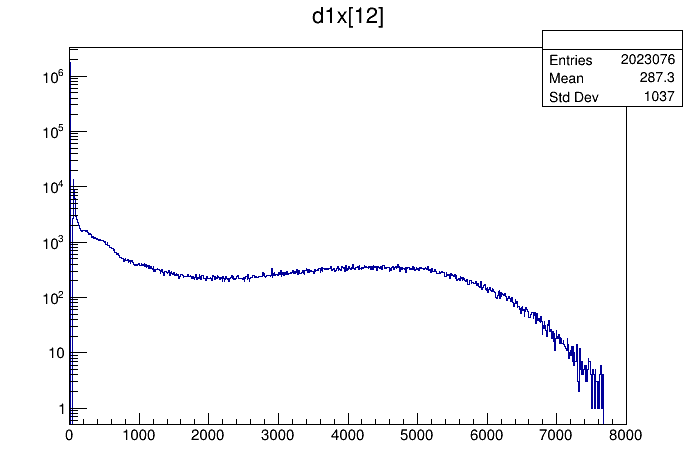

In [5]:
tree->Draw("d1x[12]>>(800,0,8000)");
gPad->SetLogy();
c1->Draw();

## 选取D1面某一条，观察其能量信号特征
## 现象：
* ### 在低能量200以内区域，事件数很多，分析是受到pedal影响

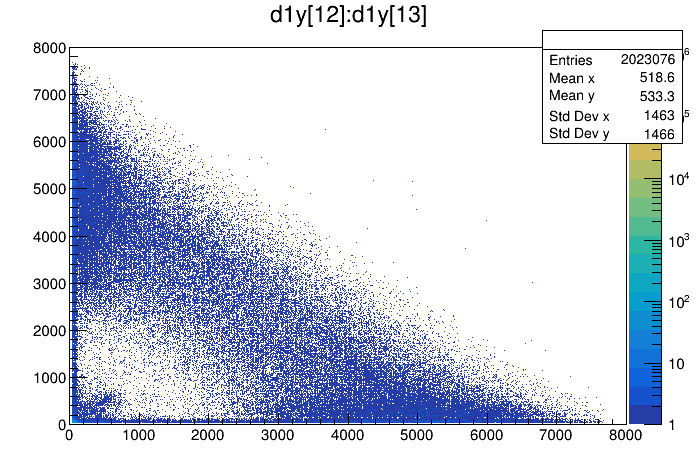

In [6]:
tree->Draw("d1y[12]:d1y[13]>>(1000,0,8000,1000,0,8000)","","colz");
gPad->SetLogy(0);
c1->Draw();

## 选取D1Y面相邻条进行观察
## 现象：
* ### 与D1X面相同

# **front- back correlation**
* ### 观察同一探测器，前后XY面的能量共享关系
* ### 此时的能量共享关系只是因为粒子的透射？

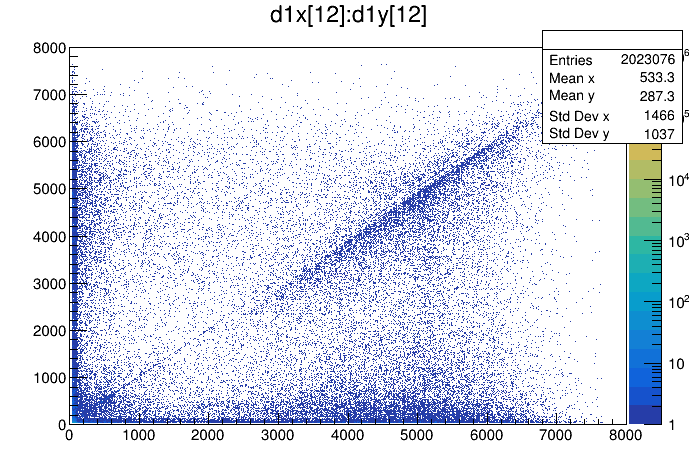

In [7]:
tree->Draw("d1x[12]:d1y[12]>>(1000,0,8000,1000,0,8000)","","colz");
c1->Draw();

# 现象：
* ### 在X轴Y轴的低能区域明显有pedal影响
* ### 由于在X面和Y面之间存在相邻条的能量共享，在目标直线区域以外存在很多散点分布

# **工作：**
* ## 对DSSD探测器的正背面关联进行能量刻度
* ## 除去pedal以及interstrip-correlation带来的影响

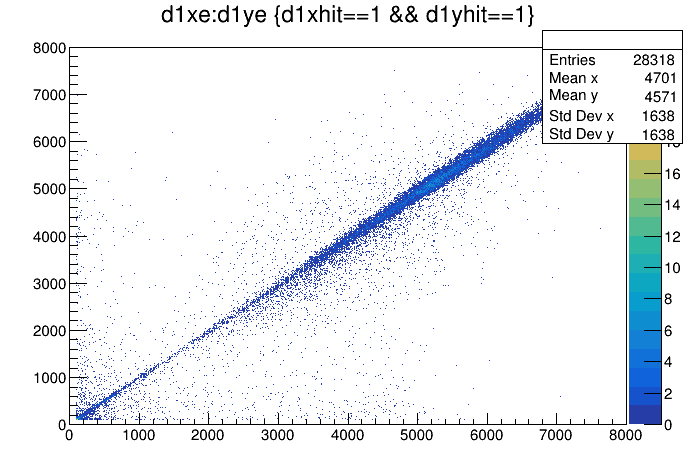

In [8]:
TCut chit="d1xhit==1 && d1yhit==1";
tree->Draw("d1xe:d1ye>>(1000,0,8000,1000,0,8000)",chit,"colz");
gPad->SetLogz(0);
c1->Draw();

# Phenomena:
* ### 由于两侧只选取一重信号事件，所以D1X:D1Y散点减少
* ### 依然存在的一些散点是偶然符合？
* ### 目标直线区域存在的不只一条直线，说明不同条的能量刻度系数不同，需要分别刻度

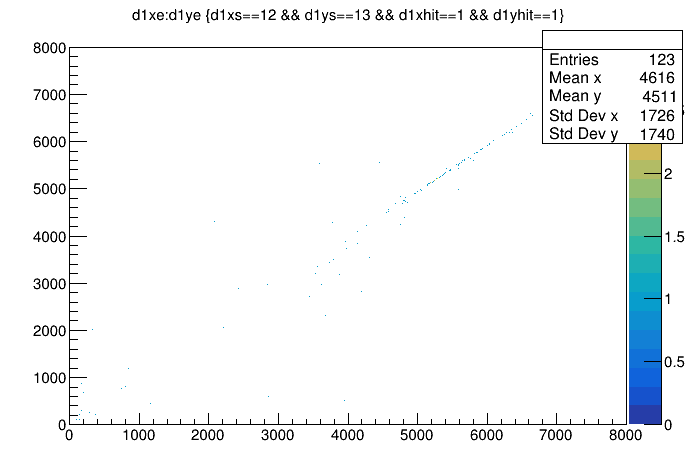

In [9]:
TCut chit1="d1xs==12 && d1ys==13 && d1xhit==1 && d1yhit==1";
tree->Draw("d1xe:d1ye>>(1000,0,8000,1000,0,8000)",chit1,"colz");
c1->Draw();

## 条件：X面，Y面各选定一条，同时X面Y面各只有一重信号
* ### 条件严格，统计量太少

# 改进：
### 不对多重性进行限制
### 要求相邻条之间没有条间能量共享，只有感应能量共享？（默认条间能量共享>100)(如何取这100这个值）

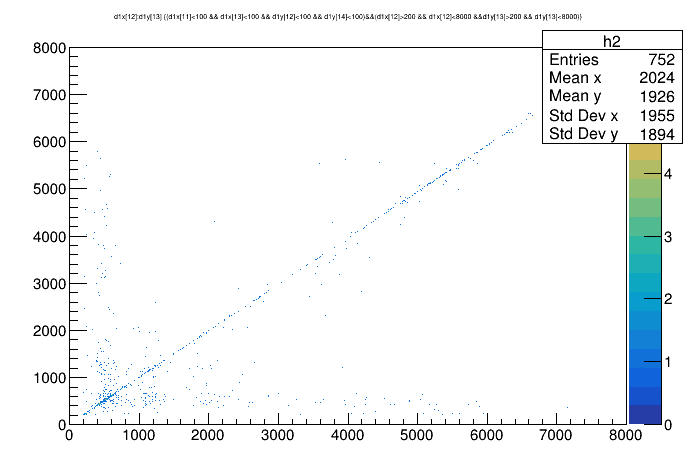

In [10]:
TCut cveto="d1x[11]<100 && d1x[13]<100 && d1y[12]<100 && d1y[14]<100";
TCut c1213="d1x[12]>200 && d1x[12]<8000 &&d1y[13]>200 && d1y[13]<8000";
tree->Draw("d1x[12]:d1y[13]>>h2(1000,0,8000,1000,0,8000)",cveto&&c1213,"colz");
c1->Draw();

# Phenomena:
* ### 在0-8000范围内有明显一条直线，统计量足够

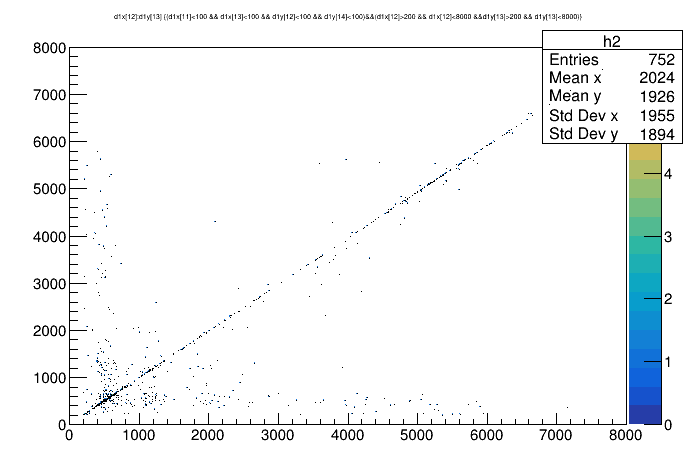

In [11]:
TGraph *gr = new TGraph(tree->GetSelectedRows(),tree->GetV2(),tree->GetV1());
gr->Draw("p");//draw point
c1->Draw();

## TH3转成TGraph进行拟合

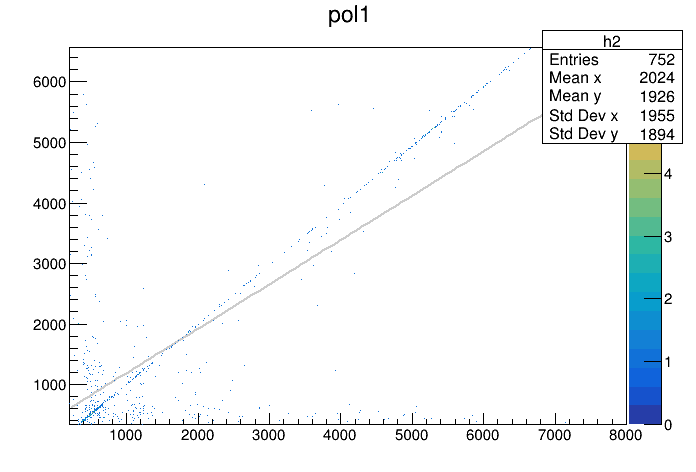


****************************************
Minimizer is Linear / Migrad
Chi2                      =   1.1529e+09
NDf                       =          750
p0                        =       442.64   +/-   65.0783     
p1                        =     0.732927   +/-   0.0231293   


In [22]:
TF1* fp1= new TF1("fp1","pol1",200,8000);
fp1->SetLineColor(kGray);
gr->Fit(fp1);
fp1->Draw();
h2->Draw("same colz");
c1->Draw();

## Phenomenon：
* ### 由于存在散点的干扰，此时拟合（最小二乘法）效果不好
* ### 可以通过人为选择拟合区域（TCutG），改善拟合，但是结果随cut范围变化而变化

In [23]:
Double_t p0,p1,p2;


****************************************
Minimizer is Linear / Robust
Chi2                      =  1.33686e+09
NDf                       =          750
p0                        =      16.4611
p1                        =     0.982673


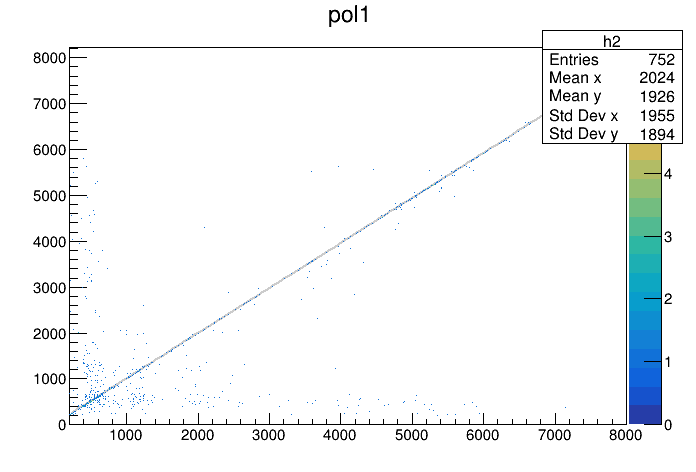

In [24]:
gr->Fit(fp1,"ROB");//使用roboust fitting
   //The option "rob=0.75" means that we want to use robust fitting and
   //we know that at least 75% of data is good points (at least 50% of points
   //should be good to use this algorithm). If you don't specify any number
   //and just use "rob" for the option, default value of (npoints+nparameters+1)/2
   //will be taken
p0=fp1->GetParameter(0);
p1=fp1->GetParameter(1);
fp1->Draw();
h2->Draw("same colz");
c1->Draw();

## 使用Robust fit，拟合结果较为理想

## 观察残差分布

In [25]:
TString stree;
stree.Form("d1y[13]:d1x[12]-(%lf*d1y[13]+%lf)>>ha(100,-50,50,1000,0,8000)",p1,p0);//%lf--Double_t

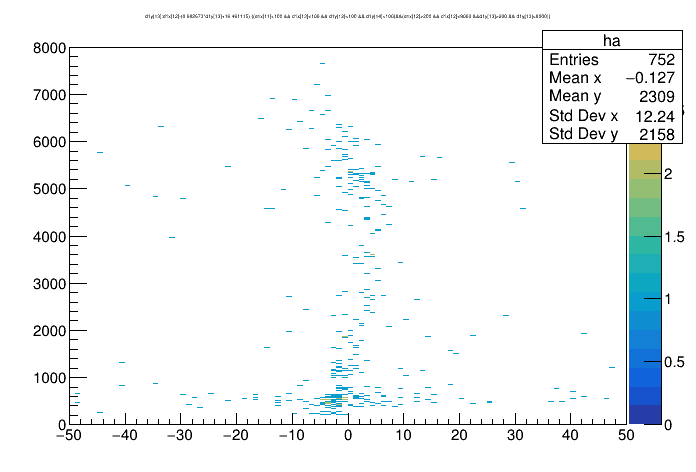

In [26]:
tree->Draw(stree.Data(),cveto&&c1213,"colz");//front-back correlation without crosstalk
c1->Draw();

# Phenomenon:
* ### 从图上看一次函数残差分布并不好，考虑使用其他函数拟合

# 使用二次多项式拟合

In [27]:
TF1 *fp2=new TF1("fp2","pol2",200,8000);
gr->Fit(fp2,"ROB");
p0=fp2->GetParameter(0);
p1=fp2->GetParameter(1);
p2=fp2->GetParameter(2);



****************************************
Minimizer is Linear / Robust
Chi2                      =  1.33799e+09
NDf                       =          749
p0                        =      13.2954
p1                        =      0.98693
p2                        = -6.79698e-07


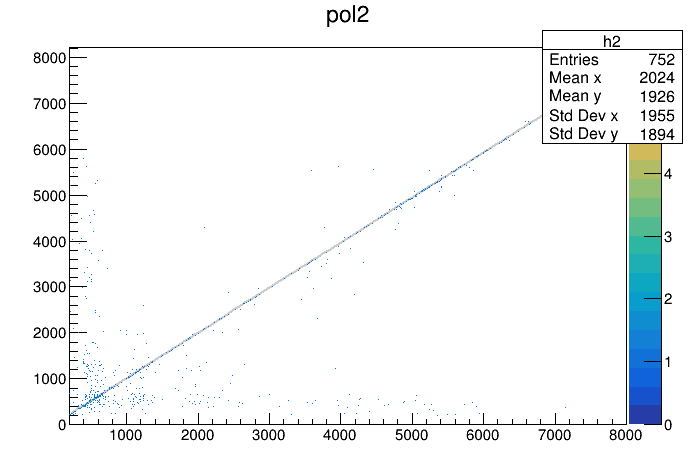

In [28]:
fp2->SetLineColor(kGray);
fp2->Draw();
h2->Draw("same colz");
c1->Draw();

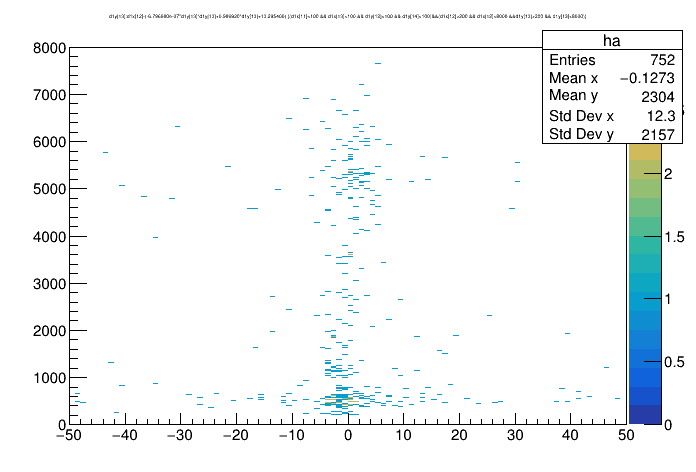

In [31]:
stree.Form("d1y[13]:d1x[12]-(%e*d1y[13]*d1y[13]+%lf*d1y[13]+%lf)>>ha(100,-50,50,1000,0,8000)",p2,p1,p0);
//%lf--Double_t  %e--按指数形式输出
tree->Draw(stree.Data(),cveto&&c1213,"colz");
gPad->SetLogz(0);
c1->Draw();

# Phenomenon:
* ### 二次函数拟合结果的残差分布有明显改善
* ### 残差分布中心值有偏差，继续加条件进行拟合，限制初步拟合的残差范围，进行再次拟合

In [32]:
TCut ccut=Form("abs(d1x[12]-(%e*d1y[13]*d1y[13]+%lf*d1y[13]+%lf))<5",p2,p1,p0);
//使残差的绝对值<5

In [33]:
tree->Draw("d1x[12]:d1y[13]>>h2b(1000,0,8000,1000,0,8000)",cveto&&c1213&&ccut,"colz");
gr=new TGraph(tree->GetSelectedRows(),tree->GetV2(),tree->GetV1());

In [34]:
gr->Fit(fp2);
//由于此时已经有了初步拟合的残差限制，不需要再开ROBfit,而且robust fit自身也有看不见的误差
p0=fp2->GetParameter(0);
p1=fp2->GetParameter(1);
p2=fp2->GetParameter(2);


****************************************
Minimizer is Linear / Migrad
Chi2                      =      1157.33
NDf                       =          268
p0                        =      12.3165   +/-   0.268164    
p1                        =      0.98711   +/-   0.000279533 
p2                        = -6.54499e-07   +/-   4.43217e-08 


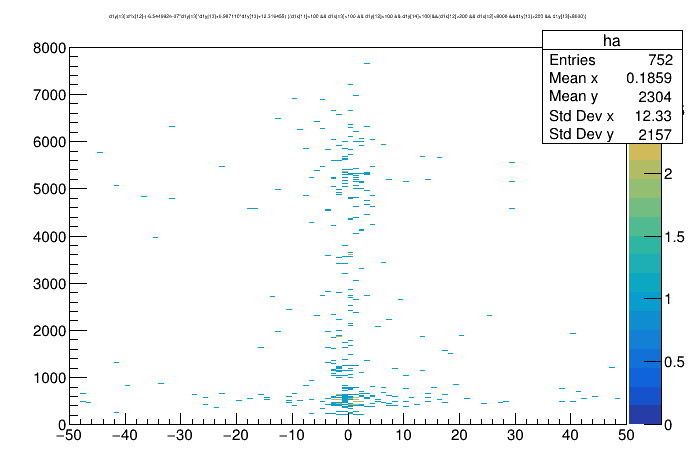

In [35]:
stree.Form("d1y[13]:d1x[12]-(%e*d1y[13]*d1y[13]+%lf*d1y[13]+%lf)>>ha(100,-50,50,1000,0,8000)",p2,p1,p0);
tree->Draw(stree.Data(),cveto&&c1213,"colz");
c1->Draw();

# Phenomenon:
* ### 比初步拟合的结果更好